## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
from typing import Dict, List, Union, Tuple
import datetime
from collections import Counter
from pathlib import Path
import sys

root = Path.cwd().parent

transformer_path = root / 'Data Processing'
path_Random_forest = root / 'Classification Models' / 'Uninterpretable Models'
path_Decision_tree = root / 'Classification Models' / 'Interpretable Models'
path_post_hoc = root / 'Model Explanations' / 'Post-Hoc Analysis'
path_inherent = root / 'Model Explanations' / 'Inherently Interpretable Analysis'

sys.path.append(str(transformer_path))
sys.path.append(str(path_Random_forest))
sys.path.append(str(path_Decision_tree))
sys.path.append(str(path_post_hoc))
sys.path.append(str(path_inherent))
sys.path.append(str(Path.cwd().parent))

from demo_distribution_plot import *
from synthetic_data_generator import *

import DataTransformer
import Randomforest
import SHAP_posthoc

c:\Users\makuz\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Creating the data

### No personal features

In [2]:
# loading
df = pd.read_csv("../Dataset/cox-violent-parsed_filt.csv")
df = df.dropna(subset=["score_text"])

# removing personal features
df = df.drop(["sex", "age", "race"], axis=1)

# Define relevant columns and target
relevant = ["juv_fel_count","juv_misd_count","juv_other_count",
            "c_charge_degree","r_charge_degree","r_days_from_arrest","vr_charge_degree"]
target = "score_text"

# Define columns to One-Hot Encode
one_hot_columns = []

y = df[target]

In [3]:
processor = DataTransformer.DataTransformer(
    df=df,
    y=y,
    relevant_columns=relevant,
    onehot_cols=one_hot_columns,
)

processor.fit_pipeline()
X_train, X_test, y_train, y_test = processor.split_data()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14634, 7), (3659, 7), (14634,), (3659,))

## Training the models

### Decision Tree

c:\Users\makuz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\makuz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\makuz\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Evaluation metrics saved to 'evaluation_results/evaluation_DecisionTreeClassifier.txt'


FileNotFoundError: [Errno 2] No such file or directory: 'Scenarios/BlackMirror/evaluation_results/no demo features/confusion_matrix_DecisionTreeClassifier.png'

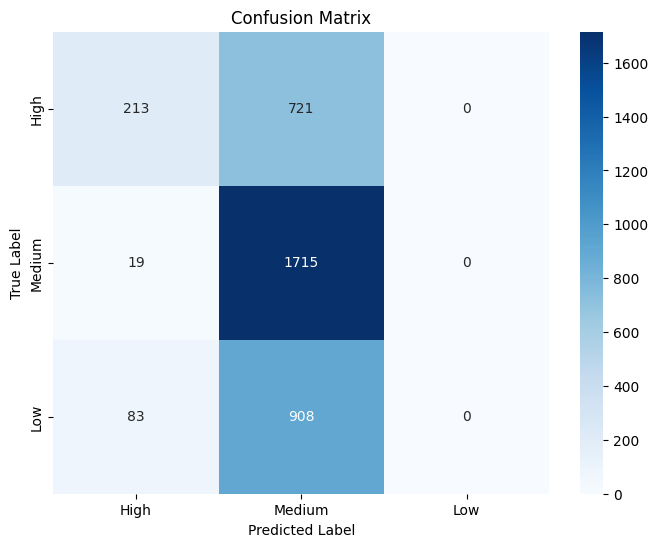

In [ ]:
import DecisionTree

dt = DecisionTree.DecisionTreeTrainer(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    model_path="Saved Models/No Personal Features/decision_tree_model.pkl",
)

dt.train_decision_tree()
trained_dt = dt.get_model()
dt.evaluate_decision_tree()
dt.save_decision_tree()

### EBM

c:\Users\makuz\AppData\Local\Programs\Python\Python313\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:1165: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(
c:\Users\makuz\AppData\Local\Programs\Python\Python313\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:1165: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(
c:\Users\m

Evaluation metrics saved to 'evaluation_results/evaluation_ExplainableBoostingClassifier.txt'


FileNotFoundError: [Errno 2] No such file or directory: 'Classification Models/Evaluation Results/confusion_matrix_ExplainableBoostingClassifier.png'

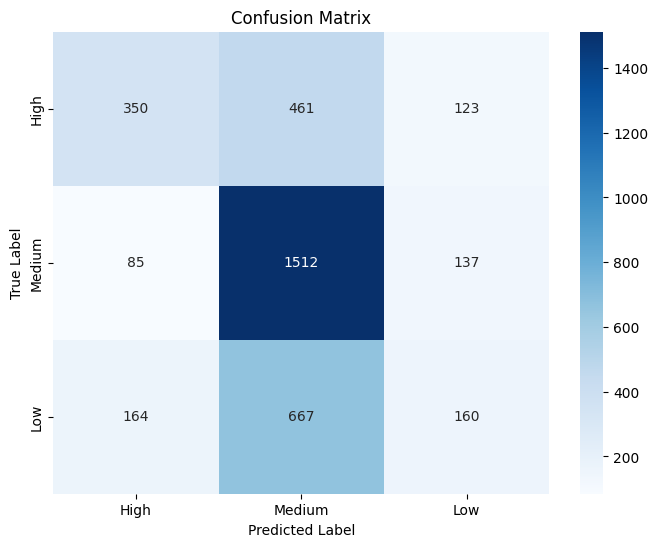

In [ ]:
# explainable boosting machine
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
import Explainable_Boosting_Machines

ebm = Explainable_Boosting_Machines.ExplainableBoostingTrainer(
    X_train, y_train, X_test, y_test, 
    feature_names=None, 
    model_path="Saved Models/No Personal Features/ebm_model.pkl")

ebm.train_ebm()
trained_ebm = ebm.get_model()
ebm.save_ebm()
ebm.evaluate_ebm()


### Random Forest

In [14]:
import Randomforest

rf = Randomforest.RandomForestTrainer(
    X_train,
    y_train,
    X_test,
    y_test,
    model_path="Saved Models/White Mirror Real World Distribution/random_forest_model.pkl",
)

rf.train_random_forest()
# rf.evaluate_random_forest()
trained_rf = rf.get_model()
rf.save_random_forest()

Model saved successfully to Saved Models/White Mirror Real World Distribution/random_forest_model.pkl.


### Neural Network

In [21]:
import MLPClassifier

nn = MLPClassifier.NeuralNetworkTrainer(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    model_path="Saved Models/White Mirror Real World Distribution/neural_network_model.pkl")

nn.train_neural_network()
# nn.evaluate_neural_network()
trained_nn = nn.get_model()
nn.save_neural_network()

Model saved successfully to Saved Models/White Mirror Real World Distribution/neural_network_model.pkl.


## Explanations

### EBM

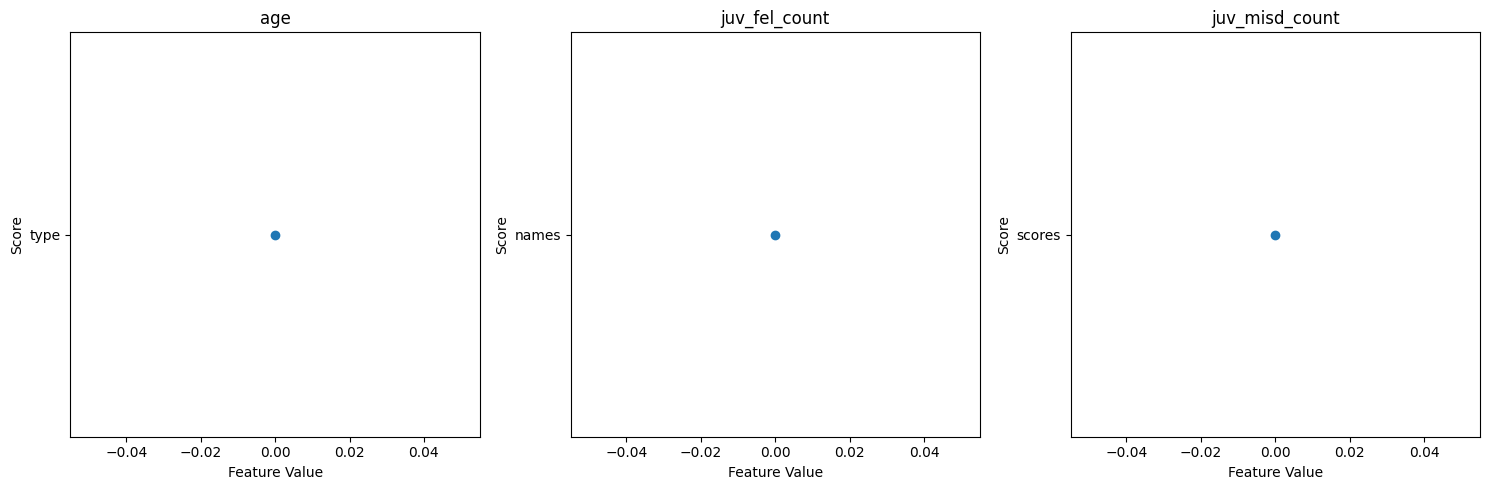

Feature importances structure: {'type': 'univariate', 'names': ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'r_days_from_arrest', 'race_African American', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other', 'sex_Female', 'sex_Male', 'c_charge_degree', 'r_charge_degree', 'vr_charge_degree'], 'scores': [np.float64(0.35468460731303264), np.float64(0.07478422957324182), np.float64(0.06674258269222665), np.float64(0.044367682139631326), np.float64(0.06499601476658), np.float64(0.043133448535739916), np.float64(0.003148557673555907), np.float64(0.015179244754244979), np.float64(0.016590708247169923), np.float64(0.0018360384189642725), np.float64(0.03328572466712642), np.float64(0.010035413628295279), np.float64(0.01008645975729901), np.float64(0.15923271416092533), np.float64(0.18724313631646158), np.float64(0.01783018759123105)]}


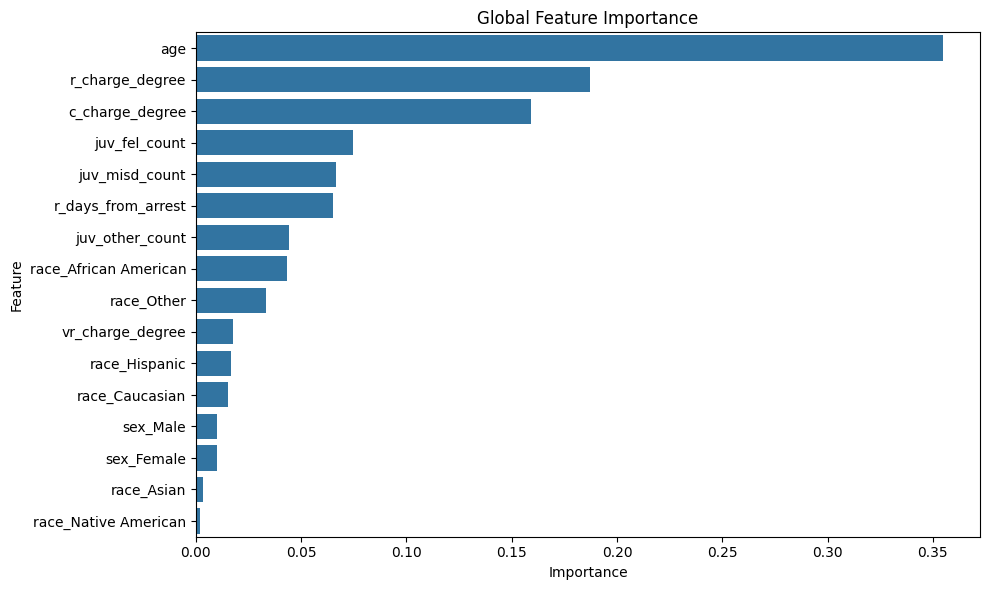

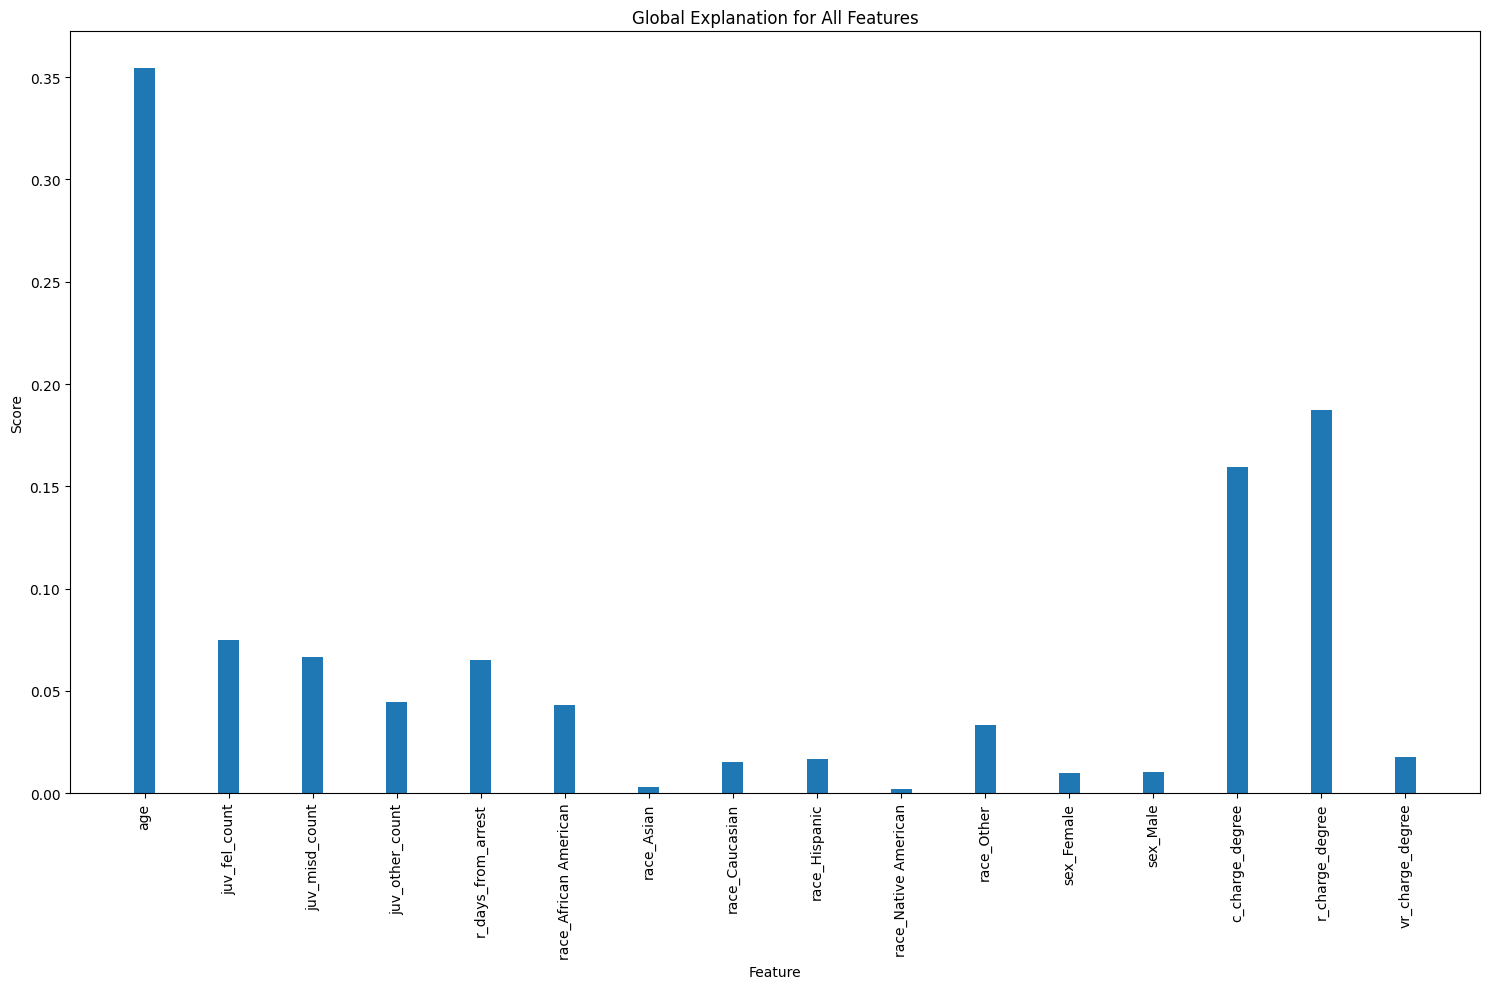

['Low', 'Medium', 'High']


In [15]:
import Vizualize_ebm

ebm.global_explanation()

ebm_global = Vizualize_ebm.VizEBM(trained_ebm, X_train, X_test, y_test, processor.get_feature_names(), y.unique().tolist())
ebm_global.explain_global()

print(y.unique().tolist())

Using 426 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


TreeExplainer not supported, switching to DeepExplainer: Model type not yet supported by TreeExplainer: <class 'interpret.glassbox._ebm._ebm.ExplainableBoostingClassifier'>
DeepExplainer also failed, switching to KernelExplainer: No module named 'tensorflow'
(426, 16)


  0%|          | 0/426 [00:00<?, ?it/s]

100%|██████████| 426/426 [15:23<00:00,  2.17s/it]
c:\Users\makuz\VS Code Projects\AI_Decoded\Model Explanations\Post-Hoc Analysis\SHAP_posthoc.py:93: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



SHAP values shape: (426, 16, 3)
X_subset shape: (426, 16)
shap_values_total shape =  (426, 16)


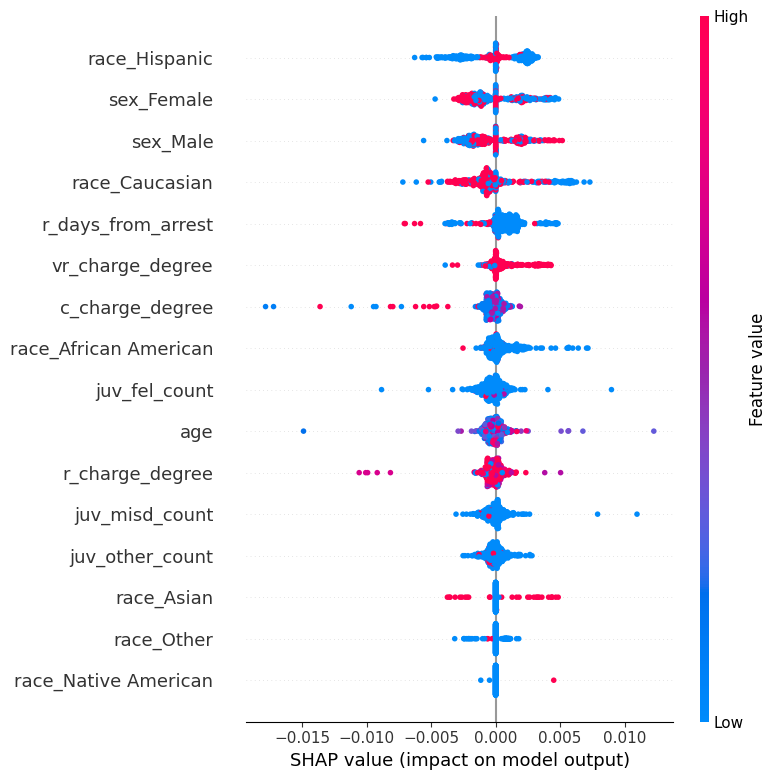

c:\Users\makuz\VS Code Projects\AI_Decoded\Model Explanations\Post-Hoc Analysis\SHAP_posthoc.py:100: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



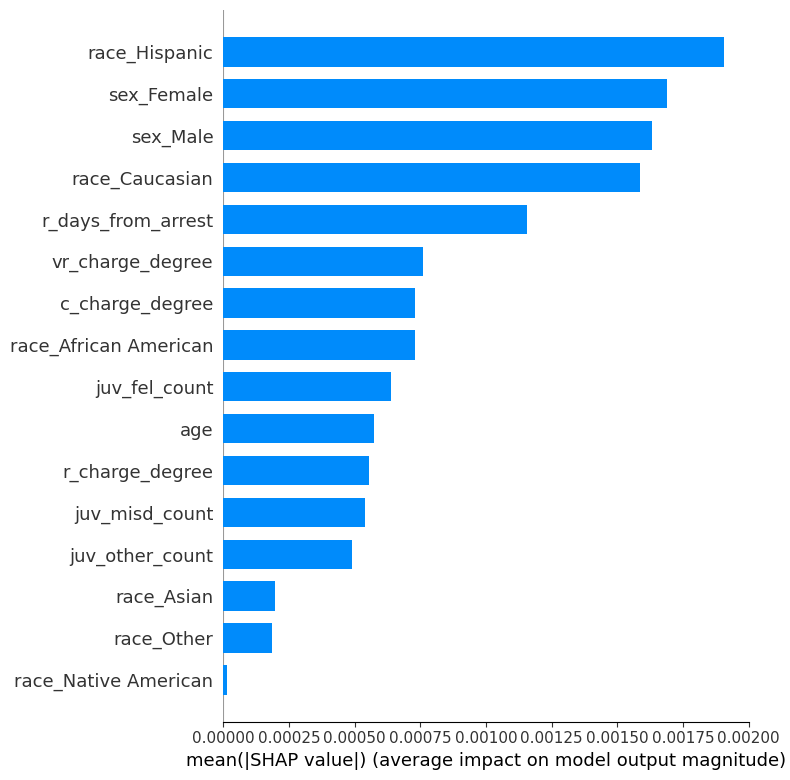

SHAP general explanation generated successfully.


In [18]:
shap_ebm = SHAP_posthoc.SHAPAnalysis(trained_ebm, X_train, X_test, y_test, processor.get_feature_names(), "Explainable Boosted Machine")
shap_ebm.perform_shap_general_explanation()

### Decision Tree

SHAP values shape: (426, 16, 3)
X_subset shape: (426, 16)
shap_values_total shape =  (426, 16)


c:\Users\makuz\VS Code Projects\AI_Decoded\Model Explanations\Post-Hoc Analysis\SHAP_posthoc.py:93: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



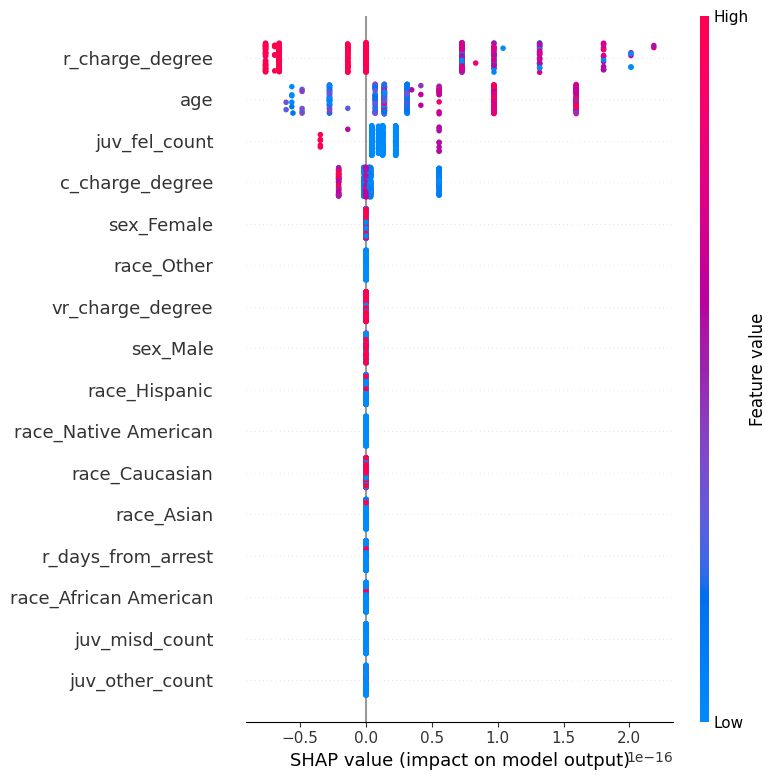

c:\Users\makuz\VS Code Projects\AI_Decoded\Model Explanations\Post-Hoc Analysis\SHAP_posthoc.py:100: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



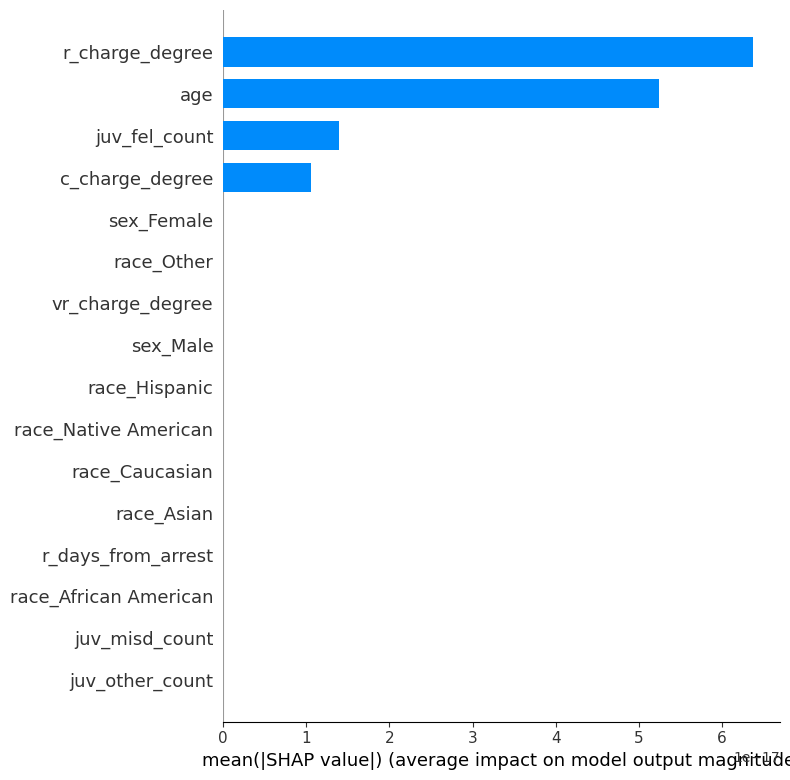

SHAP general explanation generated successfully.


In [19]:
shap_dt = SHAP_posthoc.SHAPAnalysis(trained_dt, X_train, X_test, y_test, processor.get_feature_names(), "Decision Tree")
shap_dt.perform_shap_general_explanation()

### Random Forest

SHAP values shape: (426, 16, 3)
X_subset shape: (426, 16)
shap_values_total shape =  (426, 16)


c:\Users\makuz\VS Code Projects\AI_Decoded\Model Explanations\Post-Hoc Analysis\SHAP_posthoc.py:93: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



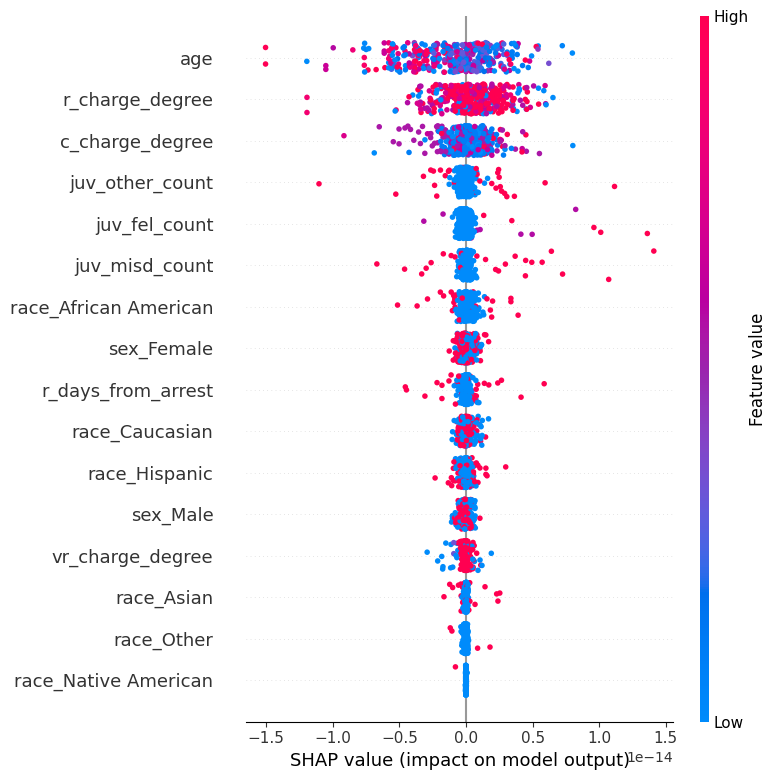

c:\Users\makuz\VS Code Projects\AI_Decoded\Model Explanations\Post-Hoc Analysis\SHAP_posthoc.py:100: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



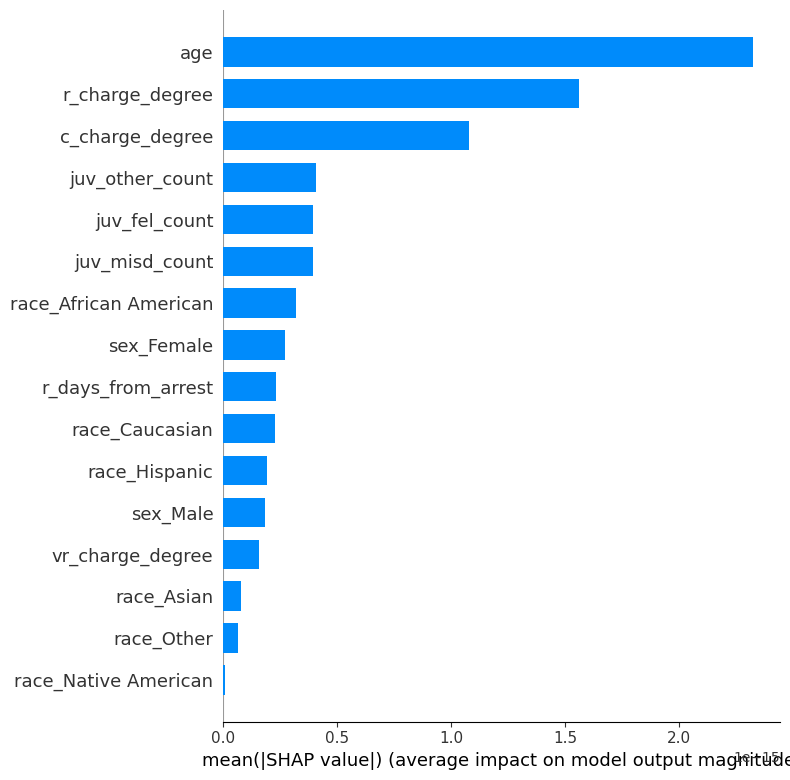

SHAP general explanation generated successfully.


In [20]:
shap_rf = SHAP_posthoc.SHAPAnalysis(
    trained_rf, X_train, X_test, y_test,
    processor.get_feature_names(), "RandomForest")
shap_rf.perform_shap_general_explanation() 

### Neural Network